<a href="https://colab.research.google.com/github/Saloni0512/PyTorch-practice-/blob/main/PyTorch_model_03_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer Vision libraries in PyTorch
* torchvision
* torchvision.datasets
* torchvision.models
* torchvision.transforms - functions for manipulating your vision data

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(torchvision.__version__)

0.21.0+cu124


## 1. Getting a dataset
We will use the FashionMNIST dataset here

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.32MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0] # train data is a tuple here
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx # class_to_idx returns a dictionary
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


 `Here we have only 1 color channel which implies that the image is a grayscale image`

### 1.1 Visualising the data

Image shape: torch.Size([1, 28, 28])


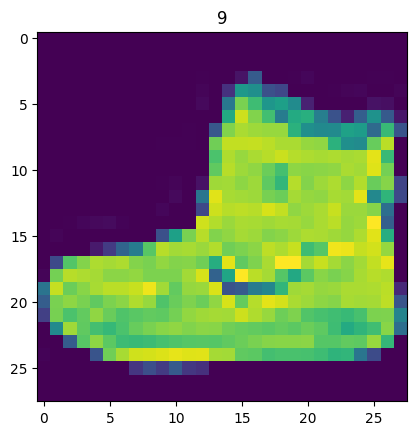

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);


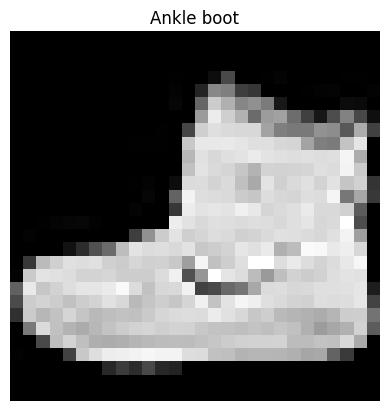

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

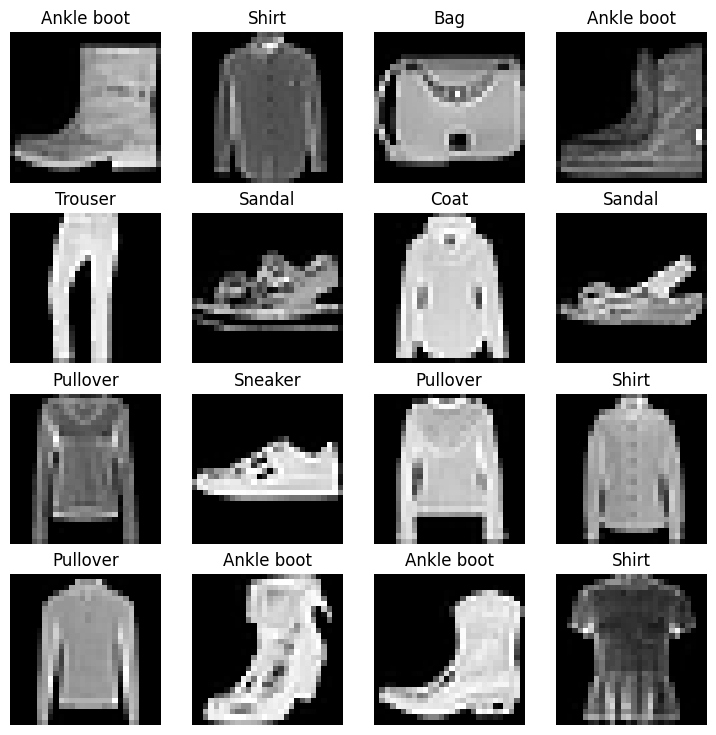

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 2. Prepare DataLoader
Dataloader turns our pytorch dataset into a Python iterable.
In other words, we can get mini batches of data from the dataset.

In [ ]:
from torch.utils.data import DataLoader

# hyperparam
BATCH_SIZE = 32

# turn data into batches
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b8d469cfbd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b8d48ee1c90>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, Shirt


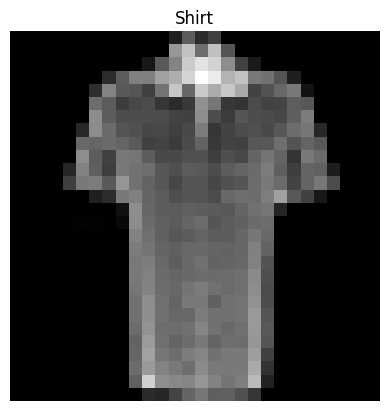

In [ ]:
# Let's check a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, {class_names[label]}")

## 3. Model 0: build a baseline model


In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]

# Print a sample
output = flatten_model(x)
print(output.shape) # [color_channels, height, width] -> [color_channels, height*width]

torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_channels: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_channels),
        nn.Linear(in_features=hidden_channels, out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_channels=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup Loss, optimizer and evaluation metrics

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [ ]:
# Define the function for accuracy as an evaluation metric
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred))*100
  return acc

### 3.2 Creating a function to time our experiments
Let's cook some code to check how fast our model runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  time = end - start
  print(f"Train time on {device}: {time:.3f} seconds")
  return time

In [ ]:
start_time = timer()

end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


3.818300001512398e-05

### 3.3 Creating a training loop and training model on batches of data

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the no of epochs
epochs = 3

### Training loop
for epoch in tqdm(range(epochs)):
  print(f"Epochs in training....{epoch}")
  train_loss = 0
  # Loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)

    # Calculate the loss per batch
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumualte train loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))
    # Calculate the test loss and acc avg per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Print out final results
  print(f"\nTrain loss: {train_loss:.4f} | Test_loss: {test_loss:.4f} | Test_accuracy: {test_acc:.4f}%")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs in training....0
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test_loss: 0.5095 | Test_accuracy: 82.0387%
Epochs in training....1
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test_loss: 0.4799 | Test_accuracy: 83.1969%
Epochs in training....2
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test_loss: 0.4766 | Test_accuracy: 83.4265%
Train time on cpu: 23.140 seconds


## 4. Make predictions and see model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # works when model is created with a class
          "model loss": loss.item(),
          "model accuracy": acc}

# Calculate model 0 results
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model loss': 0.47663894295692444,
 'model accuracy': 83.42651757188499}

## 5. Let's train model 0 on GPU now

In [ ]:
!nvidia-smi

Sun Apr 20 07:38:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

In [ ]:
# Create a model with linear and non-linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_channels: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_channels),
        nn.ReLU(),
        nn.Linear(in_features=hidden_channels, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape=784,
    hidden_channels=10,
    output_shape=len(class_names)
).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       device='cuda:0', requires_grad=True)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

### 6.1 Turning our training and testing loops into functions

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs the training step on the model trying to learn on a dataloader."""
  train_loss, train_acc = 0, 0
  model.train()

  # Loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)

    # Calculate the loss and accuracy per batch
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumualte train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Divide total train loss and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [ ]:
# Test loop function
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on the model going over dataloader."""
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss and acc avg per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    # Print out final results
    print(f"Test_loss: {test_loss:.5f} | Test_accuracy: {test_acc:.2f}%")

### 6.2 Training Model 1 with `train_step` and `test_step` functions

In [ ]:
torch.manual_seed(42)

# Measure time
train_time_start_on_gpu = timer()

# Set the no of epochs
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epochs in training...{epoch}")
  train_step(model_1,
            train_dataloader,
            loss_fn,
            optimizer,
            accuracy_fn,
            device)

  test_step(model_1,
            test_dataloader,
            loss_fn,
            accuracy_fn,
            device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs in training...0
Train loss: 1.09199 | Train acc: 61.34%
Test_loss: 0.95636 | Test_accuracy: 65.00%
Epochs in training...1
Train loss: 0.78101 | Train acc: 71.93%
Test_loss: 0.72227 | Test_accuracy: 73.91%
Epochs in training...2
Train loss: 0.67027 | Train acc: 75.94%
Test_loss: 0.68500 | Test_accuracy: 75.02%
Train time on cuda: 27.072 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model loss': 0.47663894295692444,
 'model accuracy': 83.42651757188499}

In [ ]:
# train time on cpu
total_train_time_model_0

23.14008411399999

> **Note:** Sometimes, the model might train faster on a cpu than a gpu depending on the data/hardware we use.

> This could be because-
> 1. The overhead of the GPU for sending data to and fro outweighs its computational capabilities.
> 2. The hardware you're using has a better CPU in terms of compute capabilities.

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # works when model is created with a class
          "model loss": loss.item(),
          "model accuracy": acc}

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model_1,
                             test_dataloader,
                             loss_fn,
                             accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model loss': 0.6850008964538574,
 'model accuracy': 75.01996805111821}

## 7. Model 2: Building a convolutional neural network
CNNs are also known as ConvNets, used mainly for finding patterns in visual data.


In [ ]:
# Create a CNN model class
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from cnn explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) # we can also assign a tuple to the kernel_size

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # this is an important calculation
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x= self.classifier(x)
    return x


In [ ]:
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
    ).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.1354,  0.2211, -0.2631],
                        [-0.1537, -0.0941, -0.2004],
                        [ 0.0315, -0.3292,  0.3010]]],
              
              
                      [[[-0.2832,  0.2573,  0.0555],
                        [-0.1082,  0.2060,  0.0520],
                        [ 0.2693,  0.0364, -0.1051]]],
              
              
                      [[[ 0.0896, -0.0904,  0.1403],
                        [ 0.2976,  0.1927, -0.1457],
                        [ 0.1924,  0.0596,  0.1693]]],
              
              
                      [[[-0.2032, -0.3300, -0.1288],
                        [-0.2557,  0.2735,  0.0960],
                        [ 0.1381,  0.1054, -0.0058]]],
              
              
                      [[[ 0.2609, -0.2368,  0.0210],
                        [-0.2275,  0.1028, -0.1148],
                        [ 0.1021, -0.0694,  0.2765]]],
              
              
      

### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64)) # batch_size, color_channels, height, width
test_image = images[0]

print(f"Image batch shape:{images.shape}")
print(f"Single image shape: {test_image.shape}")

Image batch shape:torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])


In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
print(conv_output.shape)

torch.Size([1, 10, 62, 62])


In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
test_rand_img = torch.randn(size=(1, 28, 28))
model_2(test_rand_img.unsqueeze(0).to(device))

tensor([[ 0.0011, -0.0150,  0.0034,  0.0529,  0.1296,  0.0538, -0.0682,  0.0696,
         -0.0107,  0.0602]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.2 Setup loss fn and optimizer for model 2

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred))*100
  return acc

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.1)

### 7.3 Train and test model 2

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epochs in training...{epoch}")
  train_step(model_2,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)

  test_step(model_2,
             test_dataloader,
             loss_fn,
             accuracy_fn,
            device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                 end=train_time_end_model_2,
                                 device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epochs in training...0
Train loss: 0.64753 | Train acc: 76.46%
Test_loss: 0.39642 | Test_accuracy: 85.92%
Epochs in training...1
Train loss: 0.35926 | Train acc: 87.12%
Test_loss: 0.34408 | Test_accuracy: 87.38%
Epochs in training...2
Train loss: 0.32295 | Train acc: 88.35%
Test_loss: 0.32135 | Test_accuracy: 88.33%
Train time on cuda: 34.504 seconds


In [ ]:
  # Get model_2 results
  model_2_results = eval_model(
    model_2,
    test_dataloader,
    loss_fn,
    accuracy_fn,
  )
  model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model loss': 0.3213522434234619,
 'model accuracy': 88.32867412140575}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model loss,model accuracy
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.321352,88.328674


In [ ]:
# @title adding train time
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model loss,model accuracy,training_time
0,FashionMNISTModelV0,0.476639,83.426518,23.140084
1,FashionMNISTModelV1,0.685001,75.019968,27.071900
2,FashionMNISTModelV2,0.321352,88.328674,34.504214


Text(0, 0.5, 'Model')

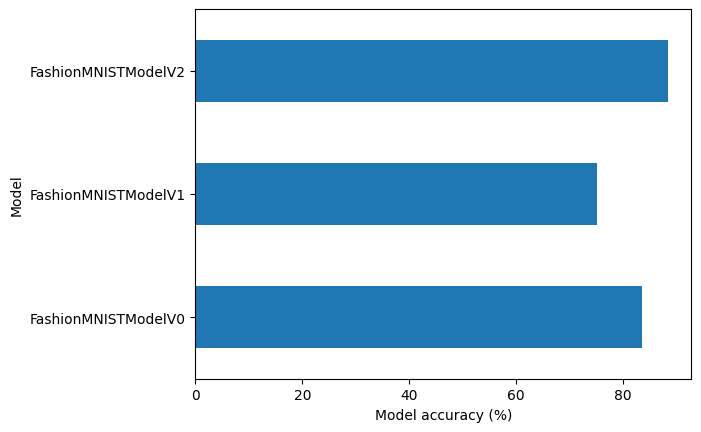

In [ ]:
# Visualise our model's predictions

compare_results.set_index('model_name')['model accuracy'].plot(kind='barh')
plt.xlabel("Model accuracy (%)")
plt.ylabel("Model")

## 9. Make and evaluate random predictions with the best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Turn logits into prediction probabilties
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into tensor
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[2].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

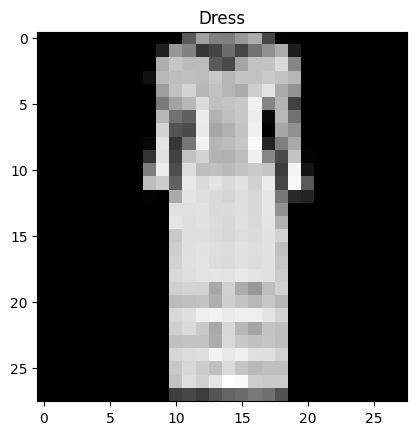

In [ ]:
plt.imshow(test_samples[2].squeeze(), cmap='gray')
plt.title(class_names[test_labels[2]])

In [ ]:
# make predictions
pred_probs = make_predictions(model_2,
                              test_samples)
pred_probs[:2]

tensor([[8.8853e-06, 7.2884e-07, 1.3143e-05, 3.5613e-05, 2.4682e-06, 2.1818e-03,
         2.2562e-05, 1.0629e-01, 2.0684e-04, 8.9123e-01],
        [1.0228e-03, 2.0575e-05, 9.0886e-01, 5.9278e-05, 8.7937e-02, 1.4715e-07,
         1.9571e-03, 1.6139e-06, 1.3791e-04, 7.3366e-06]])

In [ ]:
# Convert pred_probs into pred labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 2, 3, 6, 2, 5, 7, 1, 2])

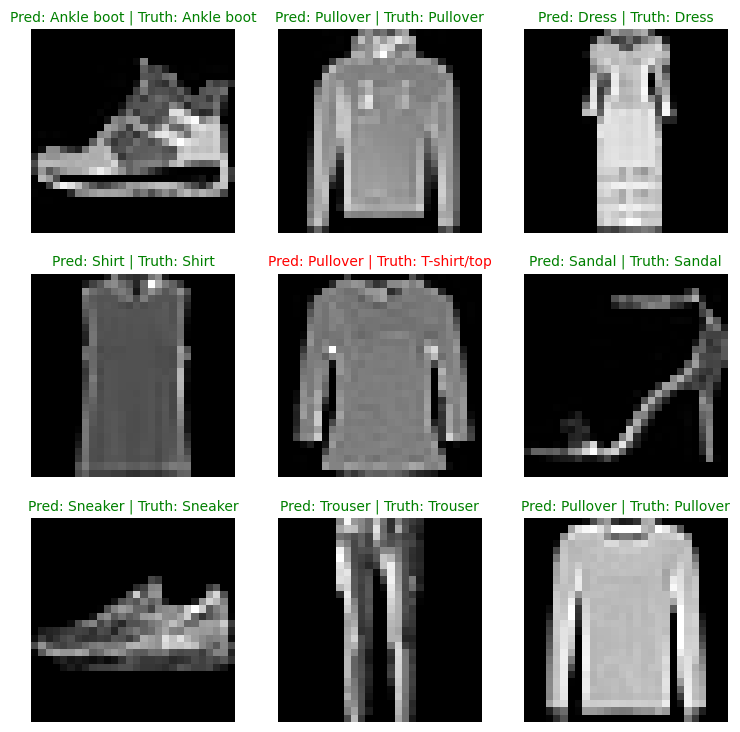

In [ ]:
# PLot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction in text form
  pred_label = class_names[pred_classes[i]]

  # Get the truth label in text form
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False);

## 10. Let's plot a confusion matrix for further eval
A confusion matrix is a good way of visualising our classification models

In [ ]:
from tqdm.auto import tqdm

# Make predictions with trained model on the entire test data
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader):
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logits = model_2(X)

    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

  0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
import mlxtend
print(mlxtend.__version__)
!pip install torchmetrics

0.23.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 752.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

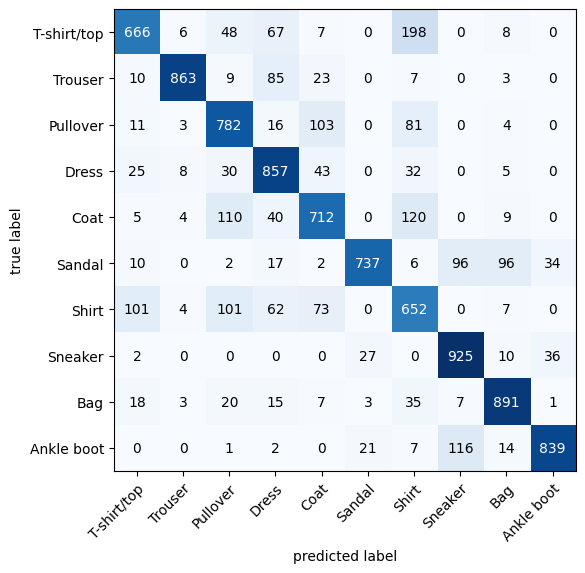

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# Plot the matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), # matplotlib prefers numpy
                                class_names=class_names,
                                figsize=(12,6))

In [ ]:
confmat_tensor

tensor([[666,   6,  48,  67,   7,   0, 198,   0,   8,   0],
        [ 10, 863,   9,  85,  23,   0,   7,   0,   3,   0],
        [ 11,   3, 782,  16, 103,   0,  81,   0,   4,   0],
        [ 25,   8,  30, 857,  43,   0,  32,   0,   5,   0],
        [  5,   4, 110,  40, 712,   0, 120,   0,   9,   0],
        [ 10,   0,   2,  17,   2, 737,   6,  96,  96,  34],
        [101,   4, 101,  62,  73,   0, 652,   0,   7,   0],
        [  2,   0,   0,   0,   0,  27,   0, 925,  10,  36],
        [ 18,   3,  20,  15,   7,   3,  35,   7, 891,   1],
        [  0,   0,   1,   2,   0,  21,   7, 116,  14, 839]])

## 11. Save and load the best performing model

In [ ]:
from pathlib import Path

# Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save path
MODEL_NAME = "Pytorch_model_03_cv.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving to: models/Pytorch_model_03_cv.pth


In [ ]:
torch.manual_seed(42)

# Now lets load the saved model
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Putting the loaded model to GPU
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model loss': 0.3213522434234619,
 'model accuracy': 88.32867412140575}

In [ ]:
# Evaluate loaded model
loaded_model_2_results = eval_model(
    loaded_model_2,
    test_dataloader,
    loss_fn,
    accuracy_fn
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model loss': 0.3213522434234619,
 'model accuracy': 88.32867412140575}

In [ ]:
# Check if the model results are close to each other
torch.isclose(torch.tensor(model_2_results["model loss"]),
              torch.tensor(loaded_model_2_results["model loss"]),
              atol=1e-02)

tensor(True)